In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,make_scorer
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,ParameterGrid,KFold,cross_val_score
from utils.metrics import partsMetrics,allMetrics
from utils.plots import exp_vs_predict

In [4]:
df=pd.read_csv('processed_outliers.csv')
print('Data shape:',df.shape)

Data shape: (519, 7)


In [5]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(X.shape)
print(y.shape)

(519, 6)
(519,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
param_grid = {
    'degree': range(2,11),
    'interaction_only': [True, False],
    'include_bias': [True, False]
}
best_params={}
best_r2=-1e9

for params in ParameterGrid(param_grid):
    poly_features = PolynomialFeatures(**params)
    X_train_poly = poly_features.fit_transform(X_train)
    X_train_poly = StandardScaler().fit_transform(X_train_poly)
    reg=LinearRegression()
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    scores = cross_val_score(reg, X_train_poly, y_train, cv=kf, scoring=make_scorer(r2_score))
    avg_r2=np.mean(scores)
    if(avg_r2<1 and avg_r2>0 and avg_r2>best_r2):
        best_r2=avg_r2
        best_params=params

print(best_r2)
print(best_params)

0.7192288021787714
{'degree': 3, 'include_bias': False, 'interaction_only': False}


In [6]:
best_params={'degree': 3, 'include_bias': False, 'interaction_only': False}
poly_features = PolynomialFeatures(**best_params)
reg=LinearRegression()
partsMetrics(df,reg,poly_features)

train rmse: 4.258575850107735
val rmse: 6.895506182189094
test rmse: 5.478080076296312

train si: 0.3472127998378496
val si: 0.5626053130160358
test si: 0.39364356245064347

train r2: 0.8778789073178123
val r2: 0.7138233208379217
test r2: 0.8536586164017208

train mape: 155.73584818555568
val mape: 283.64036650031636
test mape: 337.33810500664214


In [7]:
allMetrics(df,reg,poly_features)

all rmse: 4.412874250490375
all si: 0.35504904489673395
all r2: 0.8764477107717354
all mape: 174.139605876038


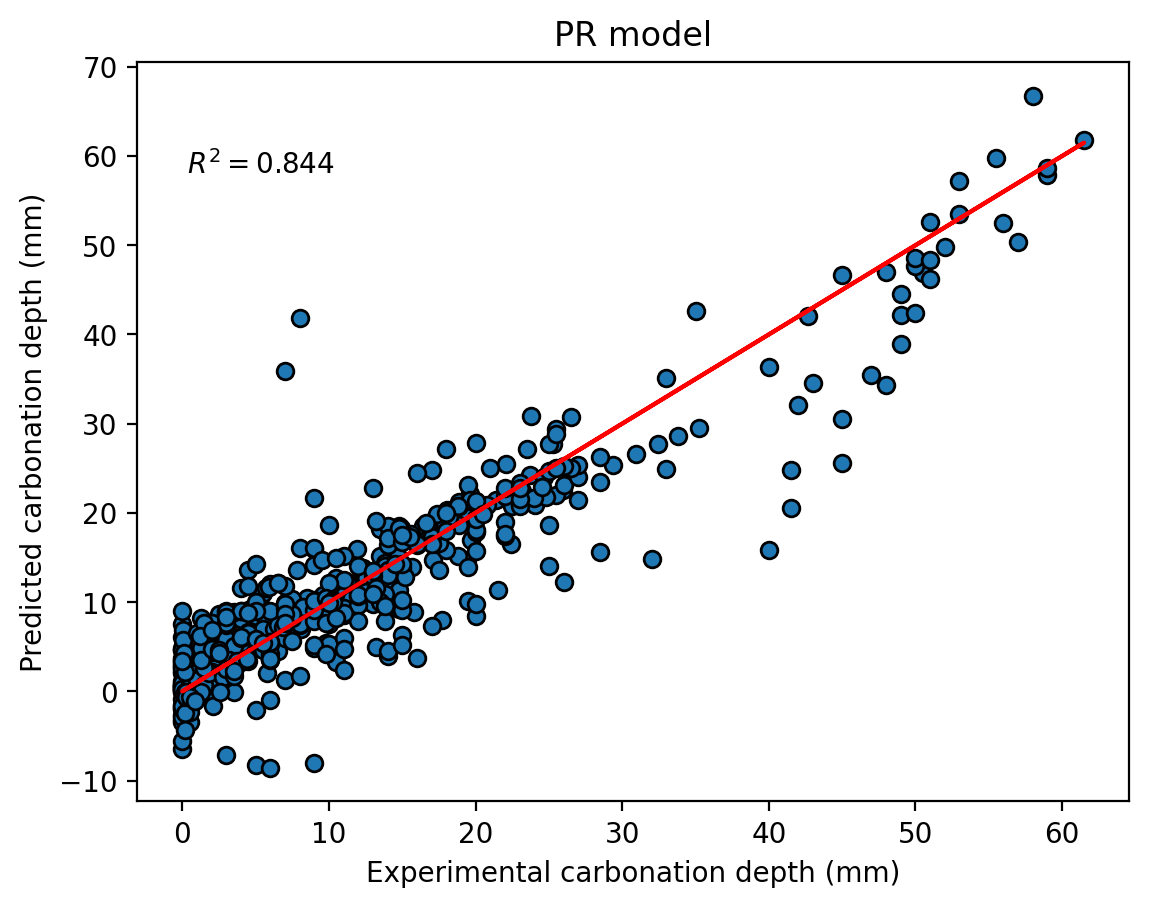

In [8]:
exp_vs_predict(df,reg,'PR model',poly_features)